<a href="https://colab.research.google.com/github/vortexash/Tensorflow-Developer/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with Tensorflow

In this notebook we're going to learn how to write neural networks for classification problems.

Classification is where we try to classify something as one thing or  another.
A few types of classification problems:
* Binary classification
* Multiclass Classification
* Multilable Classification



## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
             noise=0.03,
             random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Checkout labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

our data is a little hard to understand right now.. let's visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 1], "X1":X[:, 1],"label":y})
circles

,X0,X1,label
0,0.231481,0.231481,1
1,0.153259,0.153259,1
2,0.173282,0.173282,1
3,0.692883,0.692883,1
4,-0.896723,-0.896723,0
...,...,...,...
995,0.944125,0.944125,0
996,-0.272373,-0.272373,0
997,-0.810012,-0.810012,1
998,-0.767502,-0.767502,0


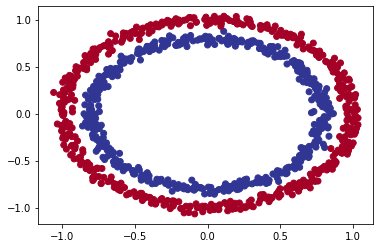

In [6]:
# Visualize wiith a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input amd output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working 
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[5], y[0]

(array([-0.47964637,  0.67643477]), 1)

# Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4.Evaluate the model
5. Tweak
6. Evaluate..

In [10]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.5.0'

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["accuracy"])
# 3. Fit the Model

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 931us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 965us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [12]:
# Let's try and improve our model by training for longer
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 986us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting arounf 50% accuracy .. its's performing as if it's guessing.

So let's step things up a notch and add an extra layer


In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
         tf.keras.layers.Dense(1),
         tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. Fitting the model

model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4.Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 917us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Improving our Model

 Let's look into our bag of tricks to see how we can improve our model.

 1. Create a model- We might to add more layers or increase the number of hiden units within a layer.
 2. Compiling a model - here we might want to choose a differernt optimization function such as Adam insted of SGD.
 3. Fitting a model- perhaps we might fit our model for more epochs(leave it training for longer)

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1.create the model (this time 3 layers)
model_3=tf.keras.Sequential([
      tf.keras.layers.Dense(100), # Add 100 dense neurons
      tf.keras.layers.Dense(10), # Add another layer with 10 neurons
      tf.keras.layers.Dense(1)                       
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
#4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 958us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

To visualize our model predition let's create a function `plot_decision_boundry()` this function will:
* Take in a trained model, features (X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)



In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max , 100),
                     np.linspace(y_min, y_max , 100))
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # make Predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the dencision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classification


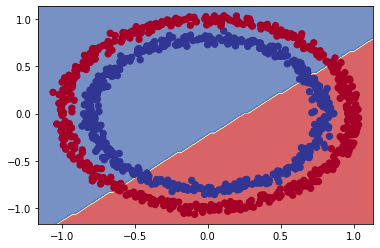

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(model_3,X=X,y=y)

In [19]:
# Lets's see  if our model can be used for Regressiong problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y= X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
#model_3.fit(X_reg_train,y_reg_train,epochs=100)

oh wait..We complied our model for binary classification problem

But we're now working on aregression problem, let's change the model to suit our data
 

In [20]:
# Set the random seed
tf.random.set_seed(42)

# 1.create the model (this time 3 layers)
model_3=tf.keras.Sequential([
      tf.keras.layers.Dense(100), # Add 100 dense neurons
      tf.keras.layers.Dense(10), # Add another layer with 10 neurons
      tf.keras.layers.Dense(1)                       
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

#3. Fit the model
model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

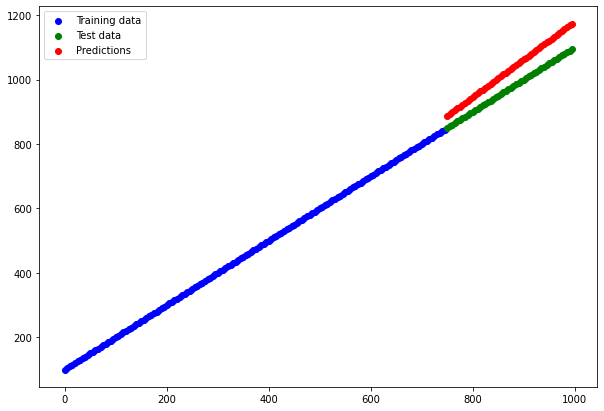

In [21]:
# Make prediction with our trained model
y_reg_preds = model_3.predict(X_reg_test) 

# Plot the model's  predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train,y_reg_train, c="b" , label ="Training data")
plt.scatter(X_reg_test,y_reg_test, c="g" , label ="Test data")
plt.scatter(X_reg_test,y_reg_preds, c="r" , label ="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [22]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#2. Compile model

model_4.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=["accuracy"])

#3.Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 968us/step - loss: 3.7547 - accuracy: 0.4150
Epoch 1

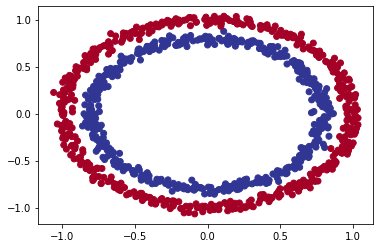

In [23]:
# Check out our data
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


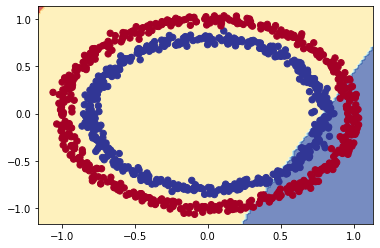

In [24]:
# Check the decision boundary for our lates model

plot_decision_boundary(model=model_4,X=X,y=y)

Let's try build our first neural network using non linear activation function.

In [25]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])
#3.fit the model

history_1 = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 988us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 946us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 959us/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 959us/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
E

doing binary classification


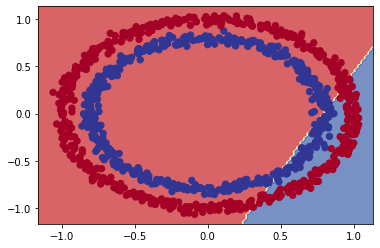

In [26]:
# Check the decision boundary for our latest model

plot_decision_boundary(model=model_5,X=X,y=y)

In [27]:
# Time to replicate the multi-layer neural network form TensorFlow playground in code...

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_6 = tf.keras.Sequential([
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(1)

])
# 2. compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
# 3. Fit the model

history = model_6.fit(X,y,epochs=250)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [28]:
# Evaluate the model
model_6.evaluate(X, y)


32/32 [==============================] - 0s 999us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


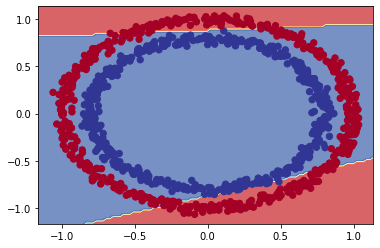

In [29]:
# How do our model predictions look?
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [30]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_7 = tf.keras.Sequential([
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid")

])
# 2. compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
# 3. Fit the model

history = model_7.fit(X,y,epochs=250)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [31]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593363776803017, 0.9919999837875366]

doing binary classification


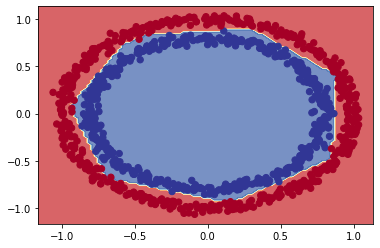

In [32]:
# How do our model predictions look?
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

**Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly?
Hint: what data did the model learn on and what data  did we predict on?

**Note:** The combination of **linear(straingt lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and no-linear functions (or lines), lets see them in action.

In [33]:
 # Create a toy a tensor( similar to the data we pass into our models)
 A = tf.cast(tf.range(-10, 10), tf.float32)
 A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

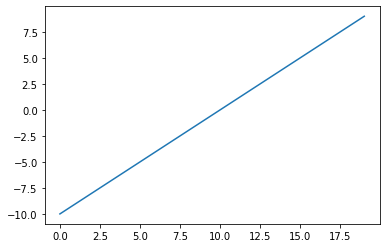

In [34]:
# Visualize our toy tensor
plt.plot(A);

In [35]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/ (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x)) 

# Use the sigmoid function on our toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

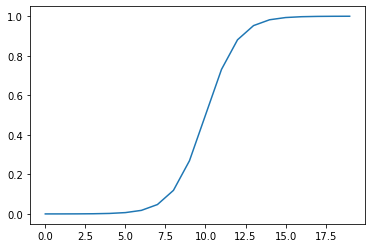

In [36]:
# Plot our toy tensor treansformed by sigmoid
plt.plot(sigmoid(A))

In [37]:
# Let's replicate the ReLu activation function
def relu(X):
  return tf.maximum(0,A)

# Pass out toy tensor to our custom relu function

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [38]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

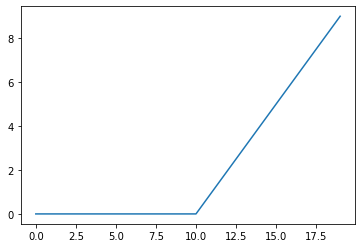

In [39]:
# Plot our toy tensor treansformed by relu
plt.plot(relu(A))

In [40]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

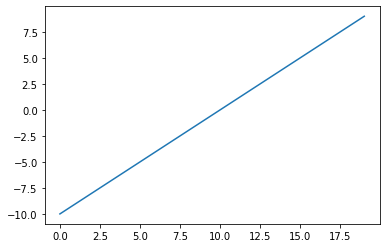

In [41]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));


In [42]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and improving our classification model


so far we've been training and testing on the same datset....

However , in machine learning this id basically a sin.

So let's create a training and test set.

In [43]:
# Chech how mant examples we have
len(X)

1000

In [44]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
# Let's  recreate our model to train on our testing data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model( same as model_7)
model_8 = tf.keras.Sequential([
          tf.keras.layers.Dense(4,activation='relu'),
          tf.keras.layers.Dense(4, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss = 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])

# Fit our model
history = model_8.fit(X_train,y_train,epochs=25)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [46]:
# 4. Ecaluate the model on test data set
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


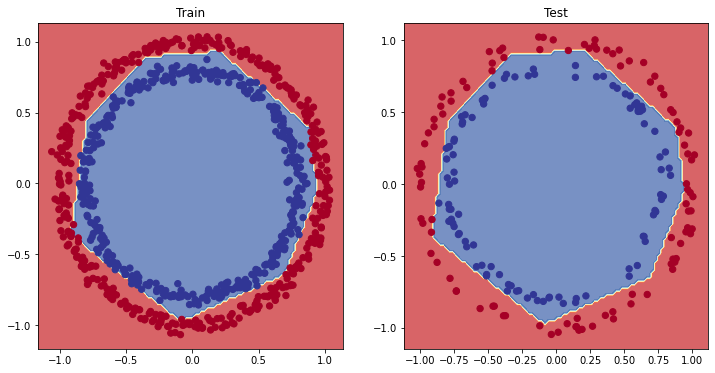

In [47]:
# Plot the decision boundaries for the training and test sets 
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train , y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test , y=y_test)

# Plot the loss (or training) curve


In [48]:
# Convert the history object into DataFrame

pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

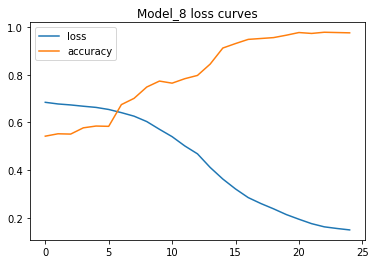

In [49]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** For many problems, the loss function going down means the model is improving (the predictions its making are getting closer to ground truth lables).

## Finding the best Learning rate

To define the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback**- you can think of a callback as an extra piece of functionality, you can add to your model while training.

* Another model (we could use the same one as above, but we're practicing building models here)
* A Modified loss curves plot.


In [50]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/20))

# Fit the model(pass lr_scheduler callback)

history_9 = model_9.fit(X_train, 
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

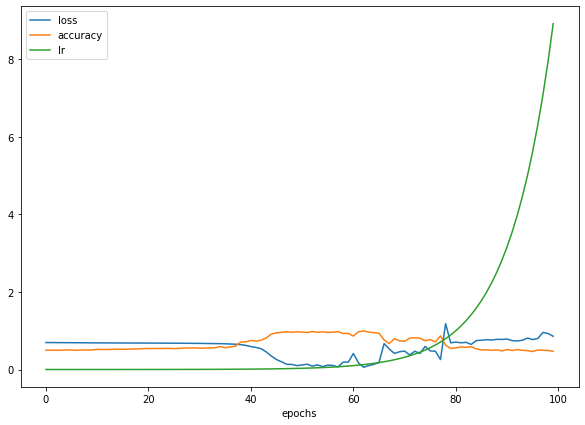

In [51]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate Vs Loss')

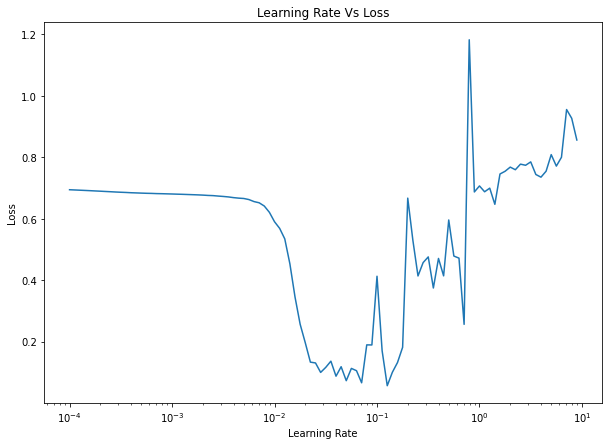

In [52]:
# Plot  the learning rate vs the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs , history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate Vs Loss")

In [53]:
# Examples of other typlical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [54]:
10**-2

0.01

In [55]:
# Let's try using a higher ideal learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# Create a model

model_10 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')                        
])

# Compile the model with ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)



Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [56]:
# Evaluate model 10 on the test dataset
model_10. evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

In [57]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


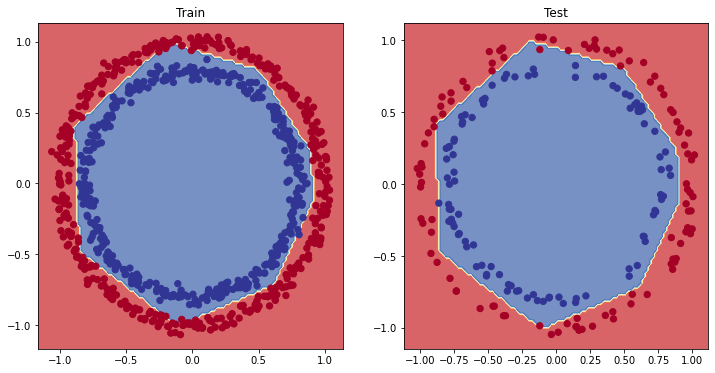

In [58]:
# Plot the decision boundaries fo training and test set

plt.figure(figsize=(12, 6))
plt.subplot(1 ,2, 1)
plt.title("Train")
plot_decision_boundary(model_10 , X=X_train , y=y_train)
plt.subplot(1 ,2 ,2)
plt.title("Test")
plot_decision_boundary(model_10 , X=X_test , y=y_test)
plt.show()

# The Confusiong Matrix

In [60]:
# Create a confusion metrix
from sklearn.metrics import confusion_matrix

# make predictions

y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)


ValueError: ignored

oops.. looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [61]:
y_preds[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

In [62]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [63]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

How about we prettify our confusion matrix?

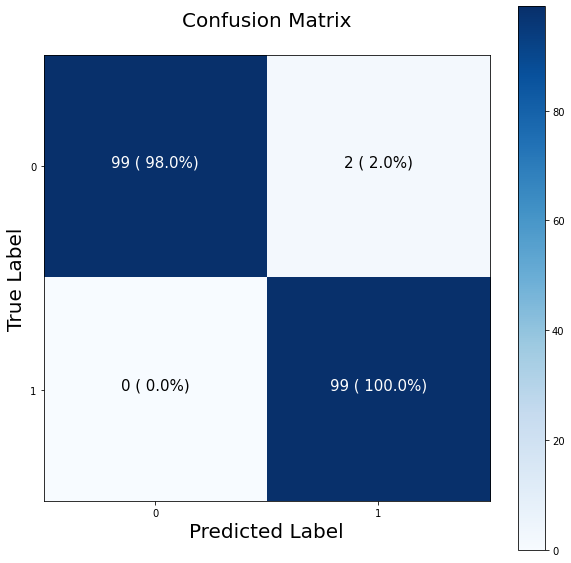

In [67]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix

n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize = figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Lable the axes
ax.set(title="Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel= "True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
# Set x-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()
#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ({cm_norm[i, j]*100: .1f}%)",
           horizontalalignment="center",
           color="white"if cm[i,j] > threshold else "black",
           size=15)